# Student Name: **Huynh Truong Tu**

Below are my assignment for analysis of arises's problem

-----------------------------------------------------------------

[Problem 1] Data acquisition

In [2]:
#Imports and Predefines
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option("max_rows", 7)
iris = datasets.load_iris()

In [4]:
X = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])
X.columns = X.columns.str.replace('()*\(cm\)','', regex= True)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
Y = pd.DataFrame(data = iris['target'], columns = ['Species'])
print(Y)

     Species
0          0
1          0
2          0
..       ...
147        2
148        2
149        2

[150 rows x 1 columns]


[Problem 2] Combining data

In [6]:
iris_data = pd.concat([X,Y], axis = 1)
print(iris_data)

     sepal length   sepal width   petal length   petal width   Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
..             ...           ...            ...           ...      ...
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


[Problem 3] Checking the data

In [7]:
print('The 4th sample from the beginning: \n', iris_data.iloc[3] )

The 4th sample from the beginning: 
 sepal length     4.6
sepal width      3.1
petal length     1.5
petal width      0.2
Species          0.0
Name: 3, dtype: float64


In [8]:
print('The total number of samples for each label: \n', iris_data.count())

The total number of samples for each label: 
 sepal length     150
sepal width      150
petal length     150
petal width      150
Species          150
dtype: int64


In [9]:
print('Check for Not-Null value', iris_data.notnull().all().all())

Check for Not-Null value True


In [10]:
print('Display all feature values: \n', iris_data.describe())

Display all feature values: 
        sepal length   sepal width   petal length   petal width      Species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.057333       3.758000      1.199333    1.000000
std         0.828066      0.435866       1.765298      0.762238    0.819232
...              ...           ...            ...           ...         ...
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000

[8 rows x 5 columns]


[Problem 4] Examining the iris dataset itself

### Abstract:

This database is detailed and acknowledged as one of the best database to be found in the pattern recognition field. The database has 3 classes for 3 types of iris, with 50 instance values each. I found this qoute at the end of the database.

"Date: July, 1988: 
The famous Iris database, first used by Sir R.A. Fisher. The dataset is take from Fisher's paper. Note that it's the same as in R, but not as in the UCI Machine Learning Repository, which has two wrong data points. This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
-References: Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936)"


### Attributes:

1. sepal length in cm

2. sepal width in cm

3. petal length in cm

4. petal width in cm

5. class: Iris Setosa --- Iris Versicolour --- Iris Virginica

[Problem 5] Extracting the required data

### Three way to extract "sepal_width" 

In [11]:
first_way = iris_data.iloc[:,1]
second_way = iris_data.loc[:,'sepal width ']
third_way = iris_data['sepal width ']
print('Getting column "sepal width "')
print('3 Methods have the same column output? {}'.format((first_way==second_way).all() and (second_way==third_way).all()))
third_way.head()

Getting column "sepal width "
3 Methods have the same column output? True


0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width , dtype: float64

In [12]:
print('The 55th to 99th data \n', iris_data.iloc[54:98,:])

The 55th to 99th data 
     sepal length   sepal width   petal length   petal width   Species
54            6.5           2.8            4.6           1.5        1
55            5.7           2.8            4.5           1.3        1
56            6.3           3.3            4.7           1.6        1
..            ...           ...            ...           ...      ...
95            5.7           3.0            4.2           1.2        1
96            5.7           2.9            4.2           1.3        1
97            6.2           2.9            4.3           1.3        1

[44 rows x 5 columns]


In [13]:
print('The 55th to 99th data of petal column \n', iris_data['petal length '].iloc[54:98])

The 55th to 99th data of petal column 
 54    4.6
55    4.5
56    4.7
     ... 
95    4.2
96    4.2
97    4.3
Name: petal length , Length: 44, dtype: float64


In [14]:
iris_data.loc[iris_data['petal width '] == 0.2]

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
...,...,...,...,...,...
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0


[Problem 6] Creating a diagram

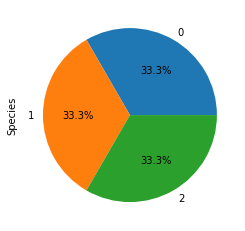

In [15]:
iris_data['Species'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

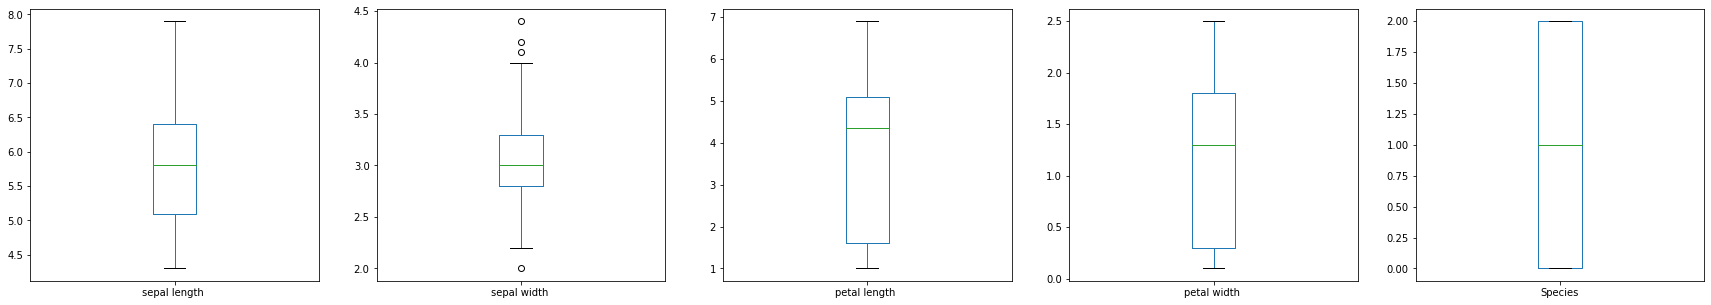

In [16]:
iris_data.plot(kind = 'box', subplots = True, figsize = [30,5])
plt.show()

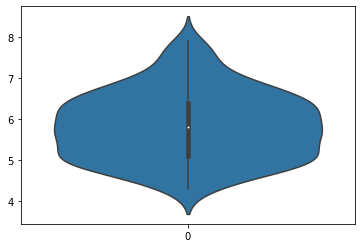

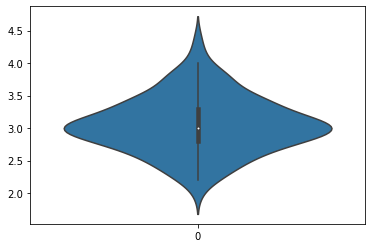

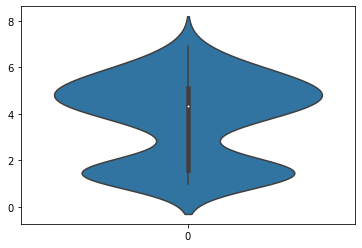

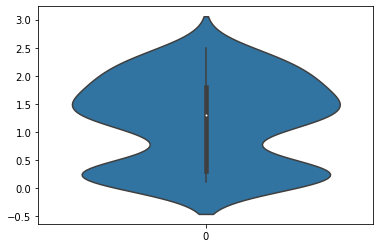

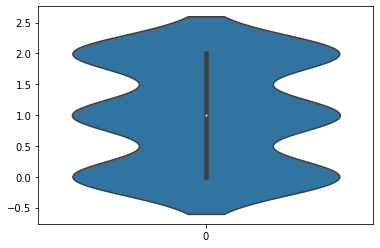

In [17]:
for value in iris_data.columns:
    sns.violinplot(data = iris_data[value])
    plt.show()

### Difference between violin plot and box plot:

Boxplots is great visualization to show a numerical variable. A boxplot shows “four main features about a variable: center, spread, asymmetry, and outliers”. 

Violin plots are very similar to boxplot. In addition to the four main features, violin plot also shows density of the variable. With the added density information, violin plot nicely reveal the structure in the data, while a boxplot does not. And this is why violin plot is better than boxplot, when you have enough data to estimate the density.

[Problem 7] Confirming the relationship between features

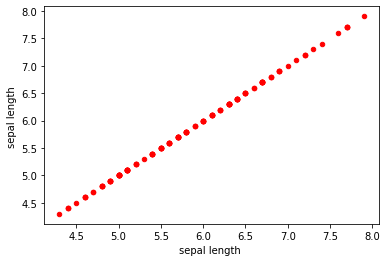

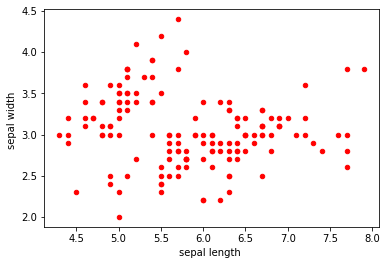

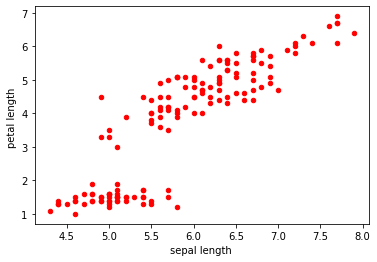

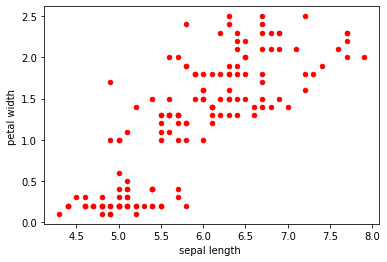

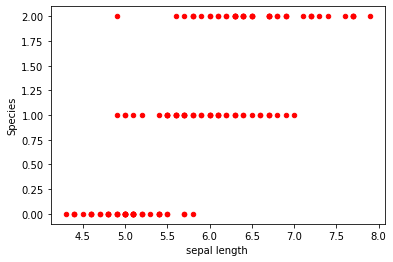

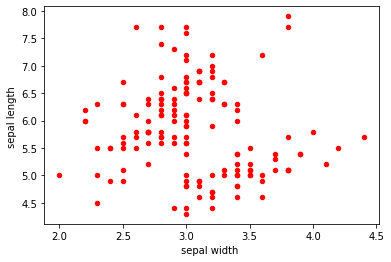

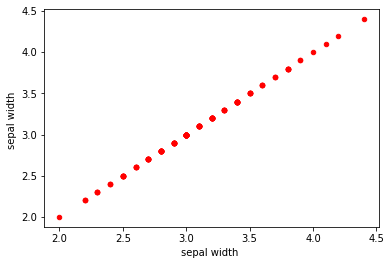

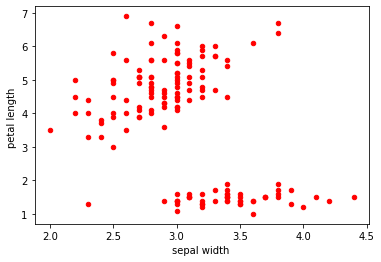

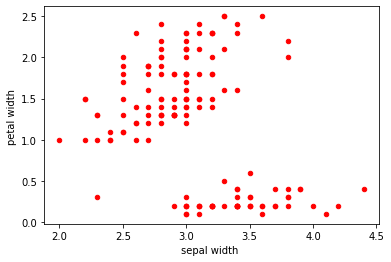

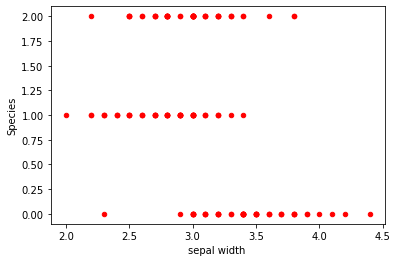

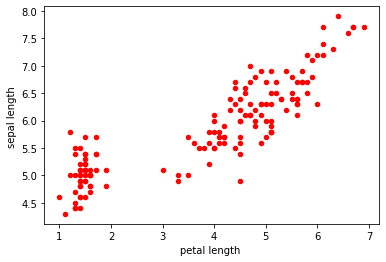

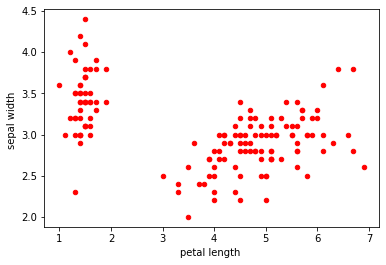

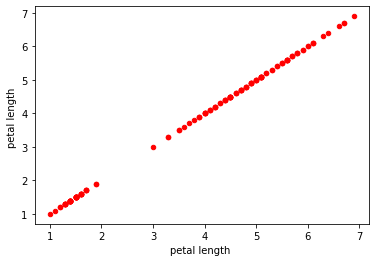

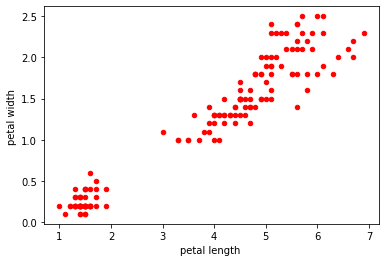

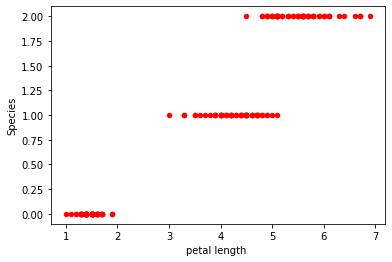

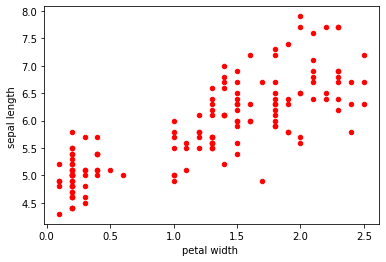

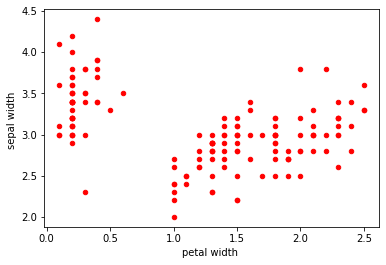

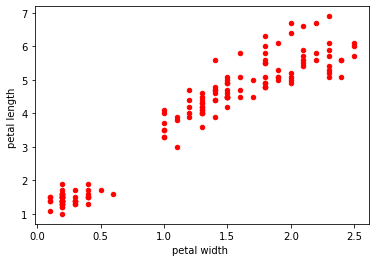

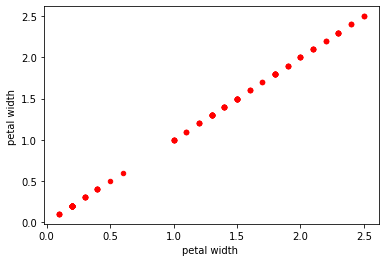

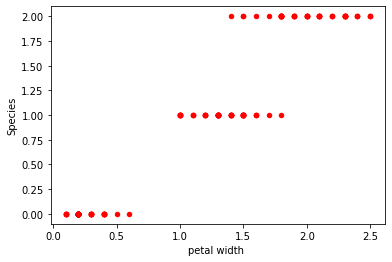

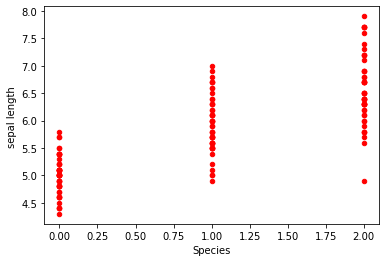

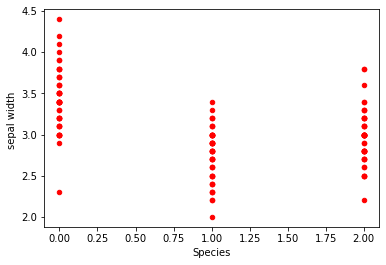

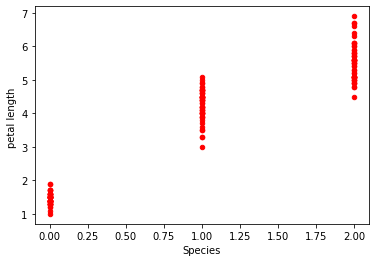

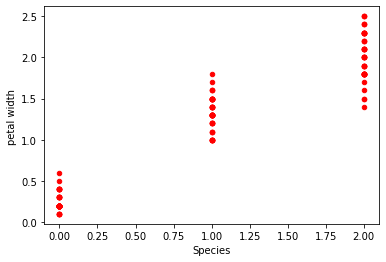

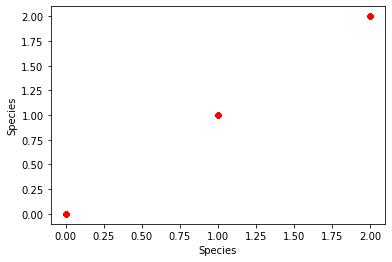

In [18]:
for fig1 in iris_data.columns:
    for fig2 in iris_data.columns:
        iris_data.plot(kind = 'scatter', x= fig1, y = fig2, color = 'r')
        plt.show()

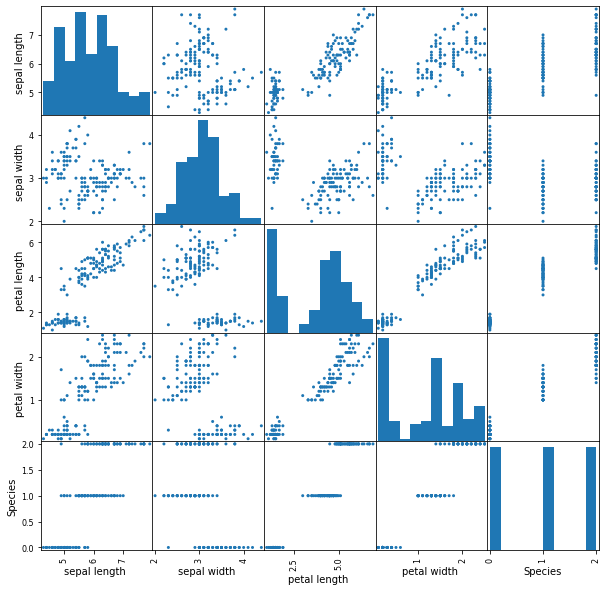

In [19]:
pd.plotting.scatter_matrix(iris_data, alpha=1,figsize=[10,10]);

In [20]:
iris_data.iloc[:,0:4].corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

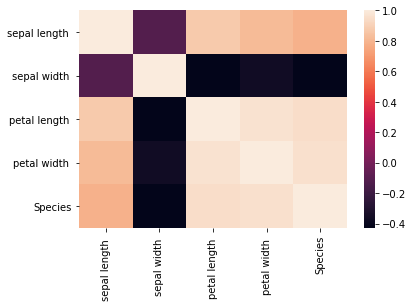

In [21]:
sns.heatmap(iris_data.corr())

[Problem 8] Explaining the results of visualized graphs and tables

Here is some conclusions I have from the graph:

* From the scatter matrix & the correlation heatmap, we can see that 
some attributes are propotion with one another, prove that there is some relationship between them. 
Eg: \
Propotion: 
petal length - sepal length \
petal width - sepal length \
petal width - petal length \
sepal length - petal width.\
Anti-propotion: \
Sepal width - Other features (but the correlation is week)

* Between species, there are features that one exceed others:
> sepal length: Virginica \
> sepal width: Setosa \
> petal length: Virginica \
> petal width: Virginica 

==================================================================================================================


This is the end of my assignment. Thank you for reading.

I'm also sorry for my late submission. I have family matters to attend to these two weeks. I'll catch up!